In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import subprocess

In [2]:
#Borrowed from Faron's Road to 4 kernel
DATA_DIR = "../input"

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'

SEED = 0
CHUNKSIZE = 100000
NROWS = 200000

TRAIN_NUMERIC = "{0}/train_numeric.csv".format(DATA_DIR)
TRAIN_DATE = "{0}/train_date.csv".format(DATA_DIR)

TEST_NUMERIC = "{0}/test_numeric.csv".format(DATA_DIR)
TEST_DATE = "{0}/test_date.csv".format(DATA_DIR)

In [3]:
#Borrowed from Faron's Road to 4 kernel

train = pd.read_csv(TRAIN_NUMERIC, usecols=[ID_COLUMN, TARGET_COLUMN],nrows=NROWS)
train["nc"] = -1
train["minv"] = -1
train["maxv"] = -1

In [4]:
nrows=0
for tr in pd.read_csv(TRAIN_NUMERIC, chunksize=CHUNKSIZE):
    feats = np.setdiff1d(tr.columns, [ID_COLUMN])

    nc = tr[feats].isnull().sum(axis=1).values
    minv = tr[feats].min(axis=1).values
    maxv =tr[feats].max(axis=1).values
    train.loc[train.Id.isin(tr.Id), 'nc'] = nc
    train.loc[train.Id.isin(tr.Id), 'minv'] = minv
    train.loc[train.Id.isin(tr.Id), 'maxv'] = maxv
    
    nrows += CHUNKSIZE
    print(nrows/NROWS)
    if nrows >= NROWS:
        break
    

0.5
1.0


In [5]:
def twoplot(df, col, xaxis=None):
    ''' scatter plot a feature split into response values as two subgraphs '''
    if col not in df.columns.values:
        print('ERROR: %s not a column' % col)
    ndf = pd.DataFrame(index = df.index)
    ndf[col] = df[col]
    ndf[xaxis] = df[xaxis] if xaxis else df.index
    ndf['Response'] = df['Response']
    
    g = sns.FacetGrid(ndf, col="Response", hue="Response")
    g.map(plt.scatter, xaxis, col, alpha=.7, s=1)
    g.add_legend();
    g.savefig("./{0}.png".format(col))
    
    del ndf

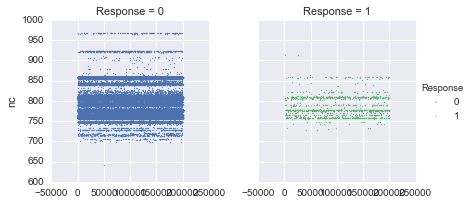

In [11]:
twoplot(train.dropna(), 'nc')

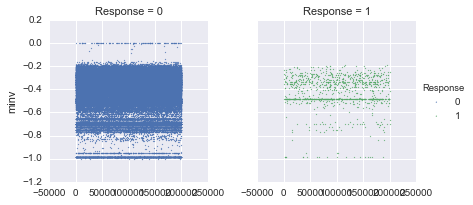

In [12]:
twoplot(train.dropna(), 'minv')

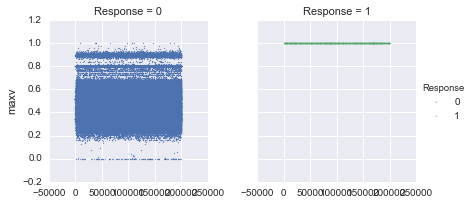

In [13]:
twoplot(train.dropna(), 'maxv')